In [ ]:
import pandas as pd


In [ ]:
# Load the dataset
df = pd.read_csv('IPL Dataset 2008 to 2023 - Sheet1.csv')


In [ ]:
# Display the first few rows of the dataset
print(df.head())


   YEAR  POS             PLAYER  TEAM  MatCH  Inns  NO  Runs    HS     out   \
0  2008    1        Shaun Marsh  PBKS     11    11   2   616   115      OUT   
1  2008    2     Gautam Gambhir    DC     14    14   1   534    86      OUT   
2  2008    3  Sanath Jayasuriya    MI     14    14   2   518  114*  NOT OUT   
3  2008    4       Shane Watson    RR     15    15   5   472   76*  NOT OUT   
4  2008    5       Graeme Smith    RR     11    11   2   441    91      OUT   

     Avg   BF      SR  100  50  4s  6s  
0  68.44  441  139.68    1   5  59  26  
1  41.07  379  140.89    0   5  68   8  
2  43.16  309  167.63    1   2  58  31  
3   47.2  311  151.76    0   4  47  19  
4     49  362  121.82    0   3  54   8  


In [ ]:
# Check for missing values
print(df.isnull().sum())


YEAR      0
POS       0
PLAYER    0
TEAM      0
MatCH     0
Inns      0
NO        0
Runs      0
HS        0
out       0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64


In [ ]:
# Basic statistics
print(df.describe())


              YEAR          POS        MatCH         Inns           NO  \
count  2341.000000  2341.000000  2341.000000  2341.000000  2341.000000   
mean   2015.544639    74.148654     8.993592     6.595899     1.524562   
std       4.687617    43.088789     5.003115     4.853570     1.602060   
min    2008.000000     1.000000     1.000000     1.000000     0.000000   
25%    2011.000000    37.000000     4.000000     2.000000     0.000000   
50%    2016.000000    74.000000     9.000000     5.000000     1.000000   
75%    2020.000000   110.000000    14.000000    11.000000     2.000000   
max    2023.000000   166.000000    19.000000    19.000000    10.000000   

              Runs           BF           SR          100           50  \
count  2341.000000  2341.000000  2341.000000  2341.000000  2341.000000   
mean    129.330201    99.865442   111.516877     0.036736     0.662537   
std     157.013043   114.047742    44.903610     0.230978     1.270205   
min       0.000000     1.000000     0

In [ ]:
import plotly.express as px


In [ ]:
# Total runs scored by each player over the years
total_runs = df.groupby('PLAYER')['Runs'].sum().reset_index()
total_runs = total_runs.sort_values(by='Runs', ascending=False).head(20)


In [ ]:
fig1 = px.bar(total_runs, x='PLAYER', y='Runs', title='Top 20 Players by Total Runs')
fig1.show()


In [ ]:
# Average strike rate by player
avg_sr = df.groupby('PLAYER')['SR'].mean().reset_index()
avg_sr = avg_sr.sort_values(by='SR', ascending=False).head(20)


In [ ]:
fig2 = px.bar(avg_sr, x='PLAYER', y='SR', title='Top 20 Players by Average Strike Rate')
fig2.show()


In [ ]:
# Total sixes hit by each player
total_sixes = df.groupby('PLAYER')['6s'].sum().reset_index()
total_sixes = total_sixes.sort_values(by='6s', ascending=False).head(20)


In [ ]:
fig3 = px.bar(total_sixes, x='PLAYER', y='6s', title='Top 20 Players by Total Sixes')
fig3.show()


In [ ]:
!pip install dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.4 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=16f78c5e7948d630c658d7699b610dd892cf495cbc662ae4f27c53a41ca384cb
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)


In [ ]:
# Layout of the dashboard
app.layout = html.Div([
    html.H1("IPL Data Analysis Dashboard"),
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': player, 'value': player} for player in df['PLAYER'].unique()],
        value='Virat Kohli',  # Default selected player
        multi=False,
        placeholder="Select a player"
    ),

    dcc.Graph(id='runs-graph'),
    dcc.Graph(id='sr-graph'),
    dcc.Graph(id='sixes-graph')

    ])

In [ ]:
# Callback to update graphs based on selected player
@app.callback(
    [Output('runs-graph', 'figure'),
     Output('sr-graph', 'figure'),
     Output('sixes-graph', 'figure')],
    [Input('player-dropdown', 'value')]
)
def update_graphs(selected_player):
    player_data = df[df['PLAYER'] == selected_player]

    # Runs over the years
    runs_fig = px.line(player_data, x='YEAR', y='Runs', title=f'Runs by {selected_player} Over the Years')

    # Strike Rate over the years
    sr_fig = px.line(player_data, x='YEAR', y='SR', title=f'Strike Rate of {selected_player} Over the Years')

    # Sixes over the years
    sixes_fig = px.line(player_data, x='YEAR', y='6s', title=f'Sixes by {selected_player} Over the Years')

    return runs_fig, sr_fig, sixes_fig



In [ ]:
# Run the app
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

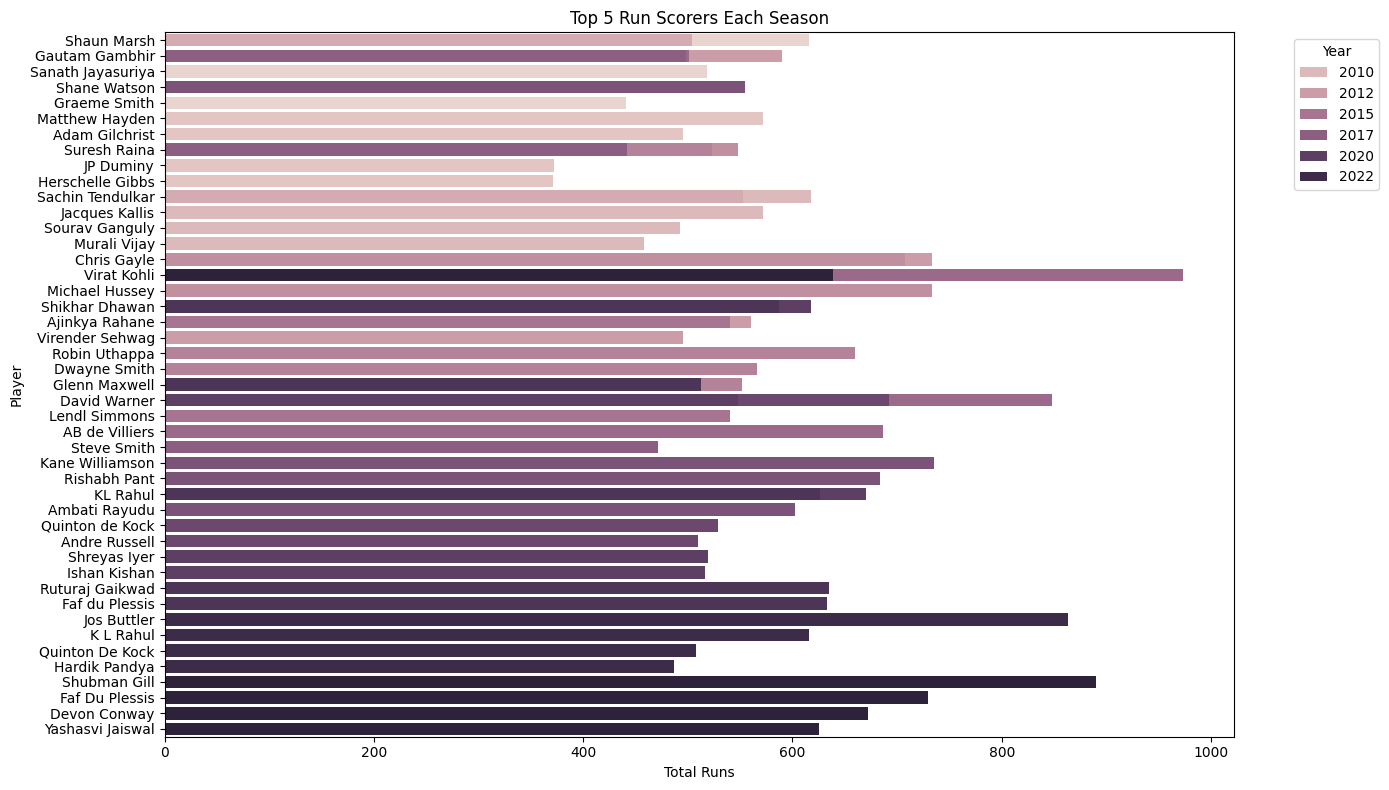

In [ ]:
#Top run scorer by season

import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 run scorers for each year
top_scorers_per_year = df.groupby(['YEAR', 'PLAYER'])['Runs'].sum().reset_index()
top_scorers_per_year = top_scorers_per_year.sort_values(['YEAR', 'Runs'], ascending=[True, False])
top_5_per_year = top_scorers_per_year.groupby('YEAR').head(5)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Runs', y='PLAYER', hue='YEAR', data=top_5_per_year, dodge=False)
plt.title('Top 5 Run Scorers Each Season')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate total fours and sixes for each player
most_boundaries = df.groupby('PLAYER')[['4s', '6s']].sum().reset_index() # Changed ipl_df to df


In [ ]:
# Top 10 players with most sixes
top_six_hitters = most_boundaries.nlargest(10, '6s')


<ipython-input-22-e6e193f37488>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




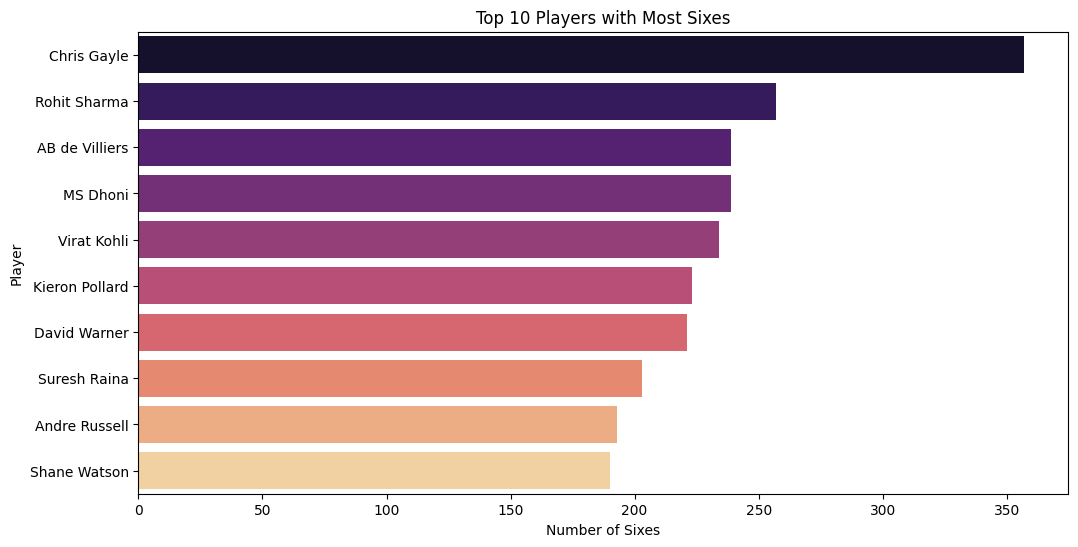

<ipython-input-22-e6e193f37488>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




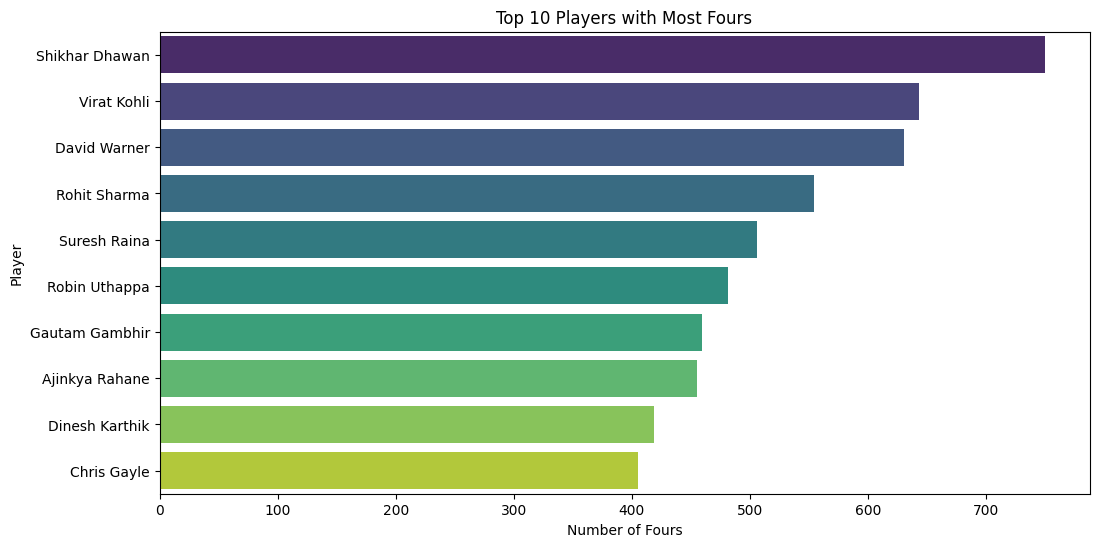

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='6s', y='PLAYER', data=top_six_hitters, palette='magma')
plt.title('Top 10 Players with Most Sixes')
plt.xlabel('Number of Sixes')
plt.ylabel('Player')
plt.show()

# Top 10 players with most fours
top_four_hitters = most_boundaries.nlargest(10, '4s')

plt.figure(figsize=(12, 6))
sns.barplot(x='4s', y='PLAYER', data=top_four_hitters, palette='viridis')
plt.title('Top 10 Players with Most Fours')
plt.xlabel('Number of Fours')
plt.ylabel('Player')
plt.show()

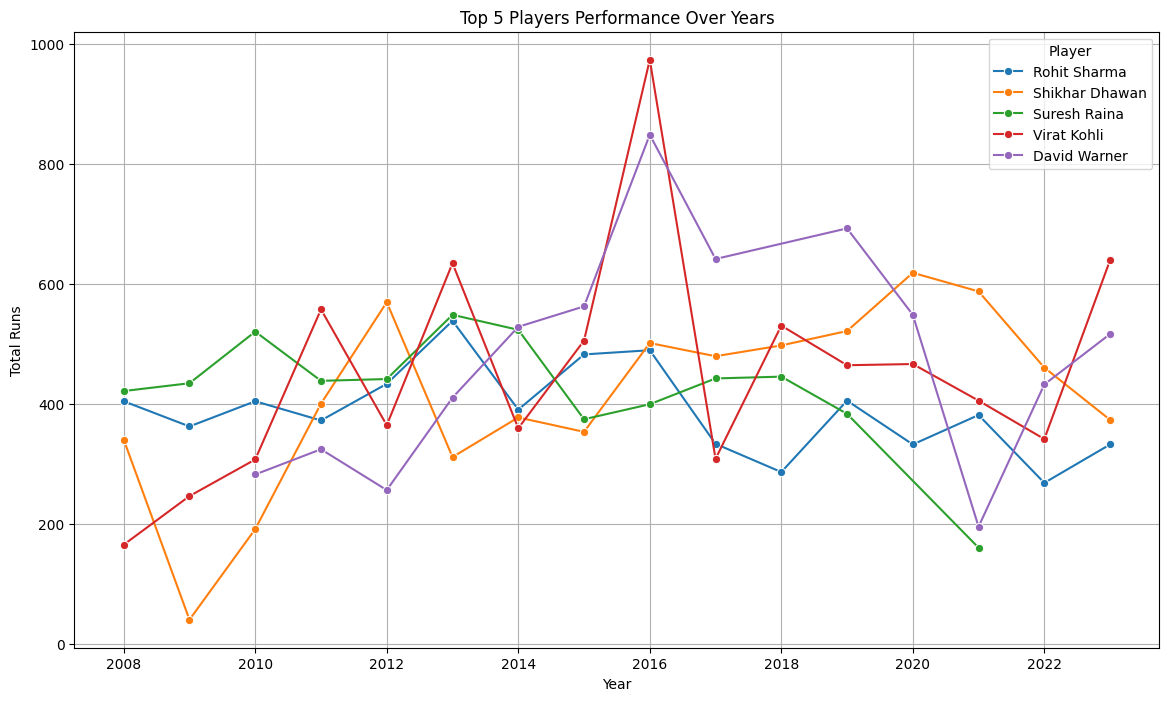

In [ ]:
# Aggregate total runs per player per year
player_yearly_performance = df.groupby(['YEAR', 'PLAYER'])['Runs'].sum().reset_index()

# Top 5 consistent players by total runs
top_players = player_yearly_performance.groupby('PLAYER')['Runs'].sum().nlargest(5).index
top_player_performance = player_yearly_performance[player_yearly_performance['PLAYER'].isin(top_players)]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='YEAR', y='Runs', hue='PLAYER', data=top_player_performance, marker='o')
plt.title('Top 5 Players Performance Over Years')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.legend(title='Player')
plt.grid(True)
plt.show()

<ipython-input-24-558d2dc42718>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




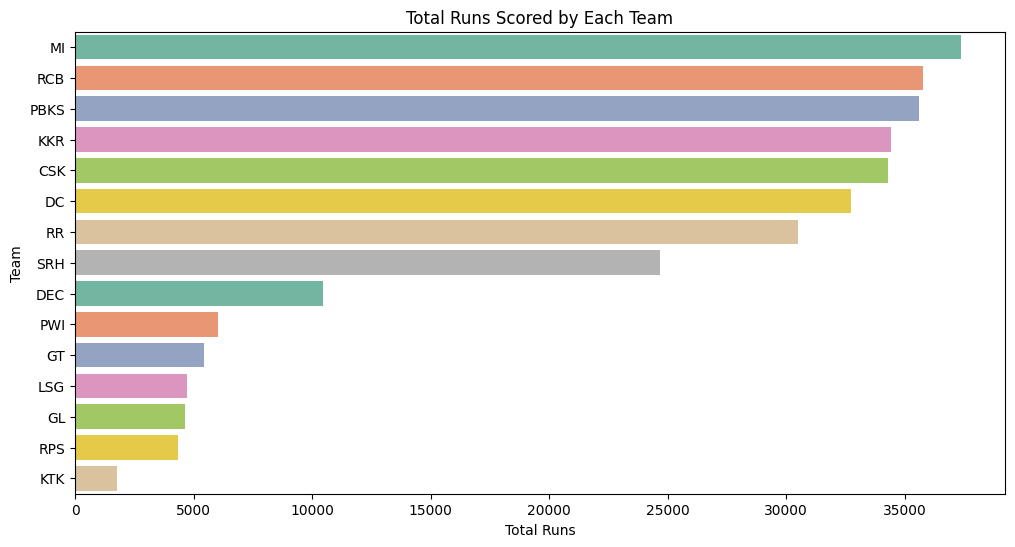

In [ ]:
# Aggregate total runs by team
team_performance = df.groupby('TEAM')['Runs'].sum().reset_index().sort_values('Runs', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Runs', y='TEAM', data=team_performance, palette='Set2')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()

<ipython-input-25-b536657fbfb2>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




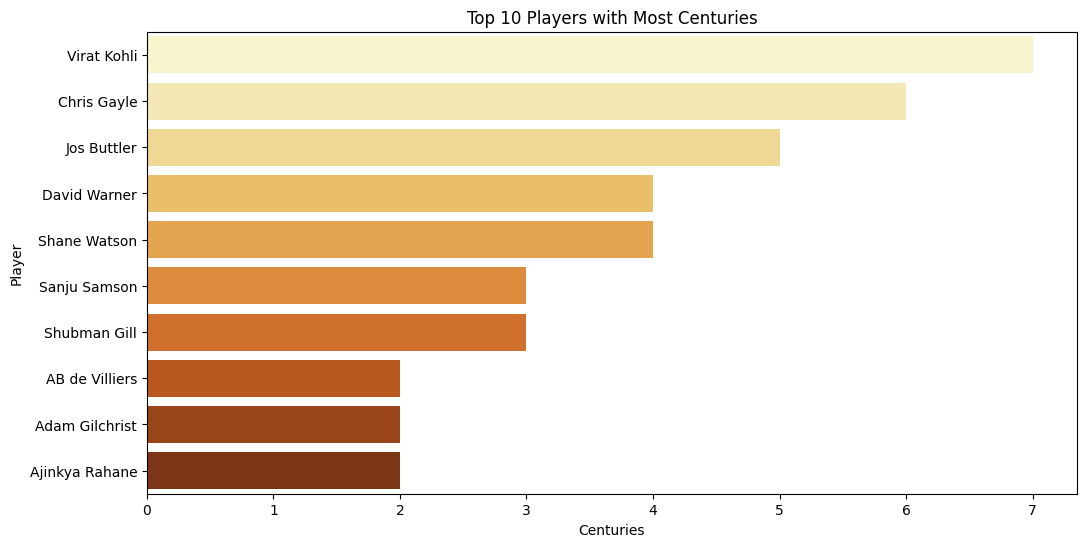

<ipython-input-25-b536657fbfb2>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




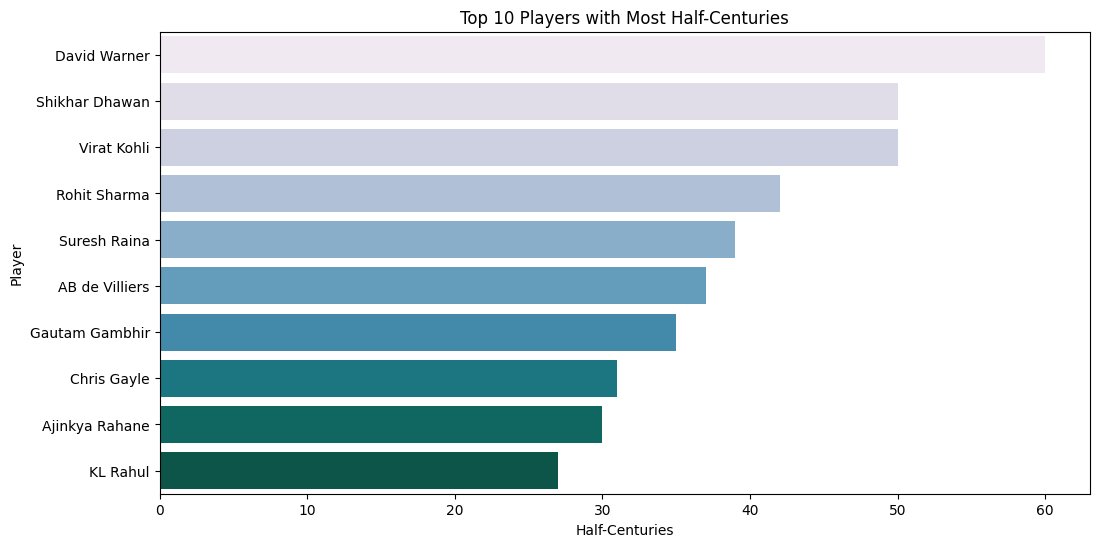

In [ ]:
# Top 10 players by centuries
top_centuries = df.groupby('PLAYER')['100'].sum().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='100', y='PLAYER', data=top_centuries, palette='YlOrBr')
plt.title('Top 10 Players with Most Centuries')
plt.xlabel('Centuries')
plt.ylabel('Player')
plt.show()

# Top 10 players by half-centuries
top_fifties = df.groupby('PLAYER')['50'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='50', y='PLAYER', data=top_fifties, palette='PuBuGn')
plt.title('Top 10 Players with Most Half-Centuries')
plt.xlabel('Half-Centuries')
plt.ylabel('Player')
plt.show()

<ipython-input-26-f453ca9b595b>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




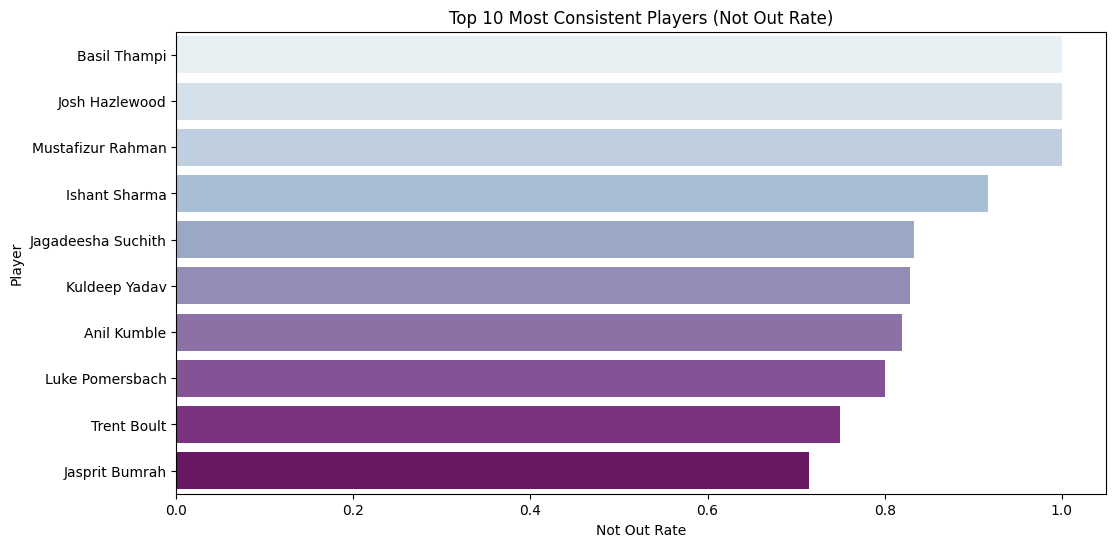

In [ ]:
# Calculate not out percentage for each player
df['Not_Out_Rate'] = df['NO'] / df['Inns']

# Top 10 players with the highest not-out rate (min 30 innings)
consistent_players = df[df['Inns'] >= 5].groupby('PLAYER')['Not_Out_Rate'].mean().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Not_Out_Rate', y='PLAYER', data=consistent_players, palette='BuPu')
plt.title('Top 10 Most Consistent Players (Not Out Rate)')
plt.xlabel('Not Out Rate')
plt.ylabel('Player')
plt.show()